In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torchvision import transforms, datasets
import torchvision.datasets as dsets
import numpy as np
import pandas as pd
from PIL import Image
import os
from torch.utils.data import Dataset, DataLoader
torch.manual_seed(0)
import matplotlib.pylab as plt
from torch.nn import Linear

In [ ]:
a = torch.tensor([[3,3],[5,5],[2,3]])

In [ ]:
a

tensor([[3, 3],
        [5, 5],
        [2, 3]])

In [ ]:
a.dtype

torch.int64

In [ ]:
a.type()

'torch.LongTensor'

In [ ]:
a.size()

torch.Size([3, 2])

In [ ]:
a.ndimension()

2

**Reshaping tensor**

In [ ]:
a = torch.tensor([[3,3],[5,5],[2,3]])
a = a.view([1,6]) #first elem is row, second elem is col
print(a)

b = torch.tensor([[1,2,3], [1,2,3]])
b = b.view([2,3]) #first elem is row, second elem is col
print(b)

tensor([[3, 3, 5, 5, 2, 3]])
tensor([[1, 2, 3],
        [1, 2, 3]])


In [ ]:
a.ndimension()

2

In [ ]:
a = a.view([-1,1]) #if we dont know the number of elem in the list
a

tensor([[3],
        [3],
        [5],
        [5],
        [2],
        [3]])

**torch to numpy and pd**

In [ ]:
npArray = np.array([2,3,25])
a = torch.from_numpy(npArray)
a

tensor([ 2,  3, 25])

In [ ]:
pandasArray = pd.Series([9,2,7])
b = torch.from_numpy(pandasArray.values)
b

tensor([9, 2, 7])

In [ ]:
new = torch.tensor([3,42,4])
print(new[0])
print(new[0].item())

tensor(3)
3


**index and slicing**

In [ ]:
c = torch.tensor([3,42,9,47,4])
c[0] = 99
c

tensor([99, 42,  9, 47,  4])

In [ ]:
c[1:4]

tensor([42,  9, 47])

In [ ]:
c[1:4] = torch.tensor([50,50,50])
c

tensor([99, 50, 50, 50,  4])

In [ ]:
a = torch.tensor([[12,14,15],
    [24,53,53],
    [53,64,15]])
a[0][2]

tensor(15)

In [ ]:
a[0:2,1]

tensor([14, 53])

**Add and others**

In [ ]:
u = torch.tensor([3,3])
v = torch.tensor([3,3])
u+v

tensor([6, 6])

In [ ]:
u*v

tensor([9, 9])

In [ ]:
dotProduct = torch.dot(u,v)
dotProduct

tensor(18)

In [ ]:
z = 5*u
z

tensor([15, 15])

In [ ]:
a = torch.tensor([[12,14,15],[24,53,53],[53,64,15]])
b = torch.tensor([[12,14,15],[24,53,53],[53,64,15]])

c = torch.mm(a,b)
c

tensor([[1275, 1870, 1147],
        [4369, 6537, 3964],
        [2967, 5094, 4412]])

In [ ]:
a = torch.tensor([1,56,34,53,65,1])
a.max()

tensor(65)

In [ ]:
b = torch.linspace(-2,2,steps=9)
b

tensor([-2.0000, -1.5000, -1.0000, -0.5000,  0.0000,  0.5000,  1.0000,  1.5000,
         2.0000])

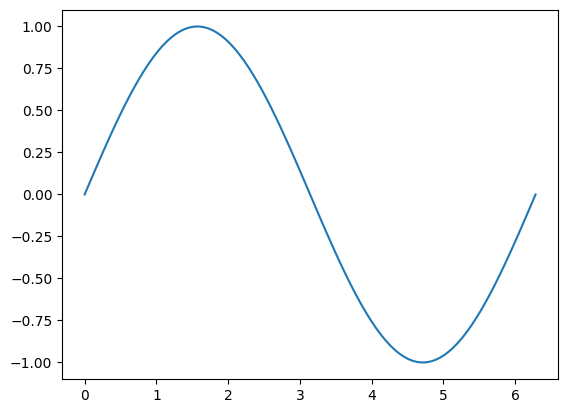

In [ ]:
x = torch.linspace(0,2*np.pi,100)
y = torch.sin(c)

import matplotlib.pyplot as plt
plt.plot(x.numpy(),y.numpy())

**dataset**

**Starting Torch Vision and Data**

In [ ]:
! wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DL0110EN-SkillsNetwork/labs/Week1/data/img.tar.gz -P /resources/data


--2024-03-30 22:36:17--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DL0110EN-SkillsNetwork/labs/Week1/data/img.tar.gz
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 198.23.119.245
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|198.23.119.245|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50460 (49K) [application/x-tar]
Saving to: ‘/resources/data/img.tar.gz’

img.tar.gz          100%[===================>]  49.28K  --.-KB/s    in 0.03s   

2024-03-30 22:36:17 (1.56 MB/s) - ‘/resources/data/img.tar.gz’ saved [50460/50460]



In [ ]:
!tar -xf /resources/data/img.tar.gz

In [ ]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DL0110EN-SkillsNetwork/labs/Week1/data/index.csv

--2024-03-30 22:36:41--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DL0110EN-SkillsNetwork/labs/Week1/data/index.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1680905 (1.6M) [text/csv]
Saving to: ‘index.csv’

index.csv           100%[===================>]   1.60M  1.05MB/s    in 1.5s    

2024-03-30 22:36:43 (1.05 MB/s) - ‘index.csv’ saved [1680905/1680905]



In [ ]:
# Read CSV file from the URL and print out the first five samples
directory=""
csv_file ='index.csv'
csv_path=os.path.join(directory,csv_file)

In [ ]:
data_name = pd.read_csv(csv_path)
data_name.head()

,category,image
0,Ankle boot,img/fashion0.png
1,T-shirt,img/fashion1.png
2,T-shirt,img/fashion2.png
3,Dress,img/fashion3.png
4,T-shirt,img/fashion4.png


The first column of the dataframe corresponds to the type of clothing. The second column is the name of the image file corresponding to the clothing. You can obtain the path of the first file by using the method  <code> <i>DATAFRAME</i>.iloc[0, 1]</code>. The first argument corresponds to the sample number, and the second input corresponds to the column index.


In [ ]:
# Get the value on location row 0, column 1 (Notice that index starts at 0)
#rember this dataset has only 100 samples to make the download faster

print('label:', data_name.iloc[1, 0]) #1 is the sample num, 0 is the label name
print('File name:', data_name.iloc[1, 1]) #1 is the sample num, 1 is the img name

label: T-shirt
File name: img/fashion1.png


In [ ]:
# Print out the total number of rows in traing dataset

print('The number of rows: ', data_name.shape[0])

The number of rows:  60000


In [ ]:
# Combine the directory path with file name

image_name =data_name.iloc[1, 1] #1 is the sample num, 1 is the img name
image_name

'img/fashion1.png'

In [ ]:
image_path=os.path.join(directory,image_name)
image_path

'img/fashion1.png'

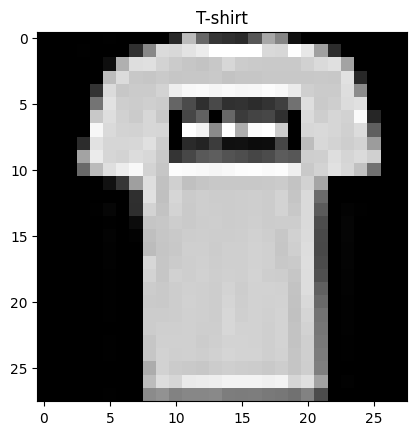

In [ ]:
# Plot the second training image

image = Image.open(image_path)
plt.imshow(image,cmap='gray', vmin=0, vmax=255)
plt.title(data_name.iloc[1, 0])
plt.show()

In [ ]:
def show_data(data_sample, shape = (28, 28)):
    plt.imshow(data_sample[0].numpy().reshape(shape), cmap='gray')
    plt.title('y = ' + data_sample[1])

In [ ]:
# Create your own dataset object

class Dataset(Dataset):

    # Constructor
    def __init__(self, csv_file, data_dir, transform=None):

        # Image directory
        self.data_dir=data_dir

        # The transform is goint to be used on image
        self.transform = transform
        data_dircsv_file=os.path.join(self.data_dir,csv_file)
        # Load the CSV file contians image info
        self.data_name= pd.read_csv(data_dircsv_file)

        # Number of images in dataset
        self.len=self.data_name.shape[0]

    # Get the length
    def __len__(self):
        return self.len

    # Getter
    def __getitem__(self, idx):

        # Image file path
        img_name=os.path.join(self.data_dir,self.data_name.iloc[idx, 1])
        # Open image file
        image = Image.open(img_name)

        # The class label for the image
        y = self.data_name.iloc[idx, 0]

        # If there is any transform method, apply it onto the image
        if self.transform:
            image = self.transform(image)

        return image, y

In [ ]:
# Create the dataset objects

dataset = Dataset(csv_file=csv_file, data_dir=directory)

Each sample of the image and the class y is stored in a tuple <code> dataset[sample]</code> . The image is the first element in the tuple <code> dataset[sample][0]</code> the label or class is the second element in the tuple <code> dataset[sample][1]</code>. For example you can plot the first image and class.


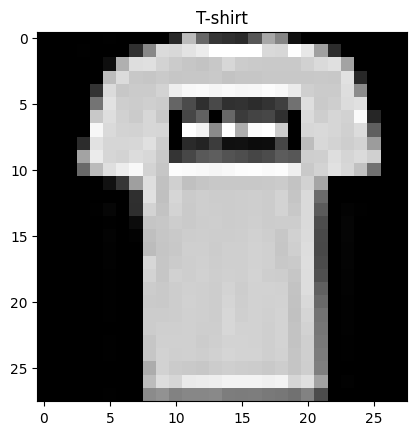

In [ ]:
image=dataset[1][0] #dont get confused. the class is returning image, then label
y=dataset[1][1]

plt.imshow(image,cmap='gray', vmin=0, vmax=255)
plt.title(y)
plt.show()

**Torchvision Transforms**

In [ ]:
# Combine two transforms: crop and convert to tensor. Apply the compose to MNIST dataset

croptensor_data_transform = transforms.Compose([transforms.CenterCrop(20), transforms.ToTensor()])
dataset = Dataset(csv_file=csv_file , data_dir=directory,transform=croptensor_data_transform )
print("The shape of the first element tensor: ", dataset[0][0].shape)


The shape of the first element tensor:  torch.Size([1, 20, 20])


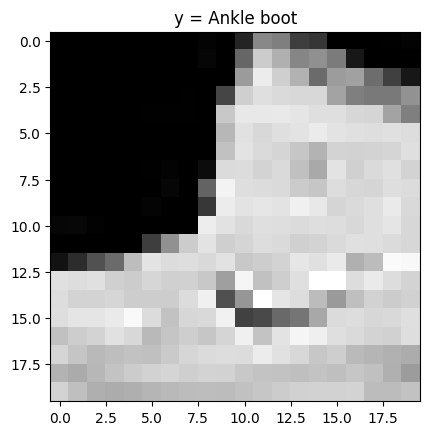

In [ ]:
# Plot the first element in the dataset

show_data(dataset[0],shape = (20, 20)) #the function in defined earlier. dataset[0] is the sample number

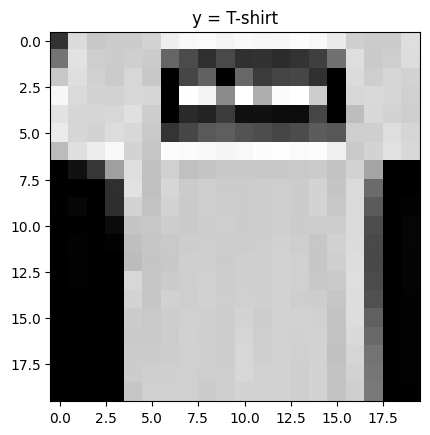

In [ ]:
# Plot the second element in the dataset

show_data(dataset[1],shape = (20, 20))

In the below example, we Vertically flip the image, and then convert it to a tensor. Use <code>transforms.Compose()</code> to combine these two transform functions. Plot the flipped image.


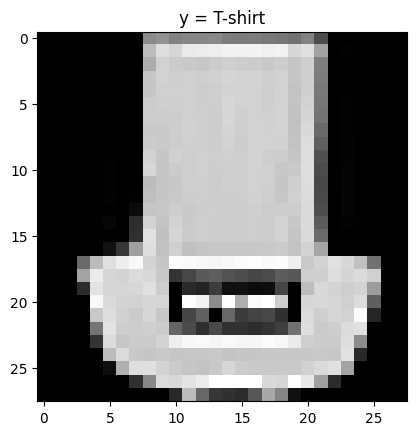

In [ ]:
# Construct the compose. Apply it on MNIST dataset. Plot the image out.

fliptensor_data_transform = transforms.Compose([transforms.RandomVerticalFlip(p=1),transforms.ToTensor()])
dataset = Dataset(csv_file=csv_file , data_dir=directory,transform=fliptensor_data_transform )
show_data(dataset[1])

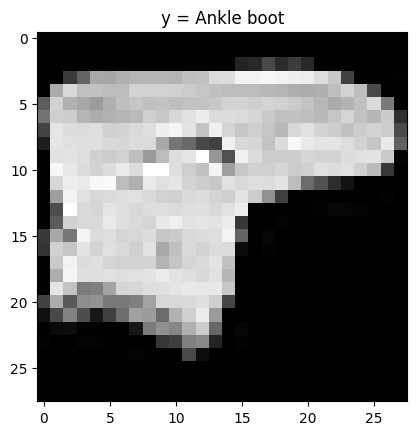

In [ ]:
# Practice: Combine vertical flip, horizontal flip and convert to tensor as a compose. Apply the compose on image. Then plot the image

verticalFlipAndHorizontalFlip_data_transform = transforms.Compose([transforms.RandomVerticalFlip(p=1),transforms.RandomHorizontalFlip(p=1),transforms.ToTensor()])

dataset = Dataset(csv_file=csv_file , data_dir=directory,transform=verticalFlipAndHorizontalFlip_data_transform)
show_data(dataset[0])

**MNIST dataset**

In [ ]:
# Import the prebuilt dataset into variable dataset


dataset = dsets.MNIST(
    root = './data',
    download = True,
    transform = transforms.ToTensor()
)

In [ ]:
# Show data by diagram

def show_data(data_sample, shape = (28, 28)):
    plt.imshow(data_sample[0].numpy().reshape(shape), cmap='gray')
    plt.title('y = ' + str(data_sample[1]))

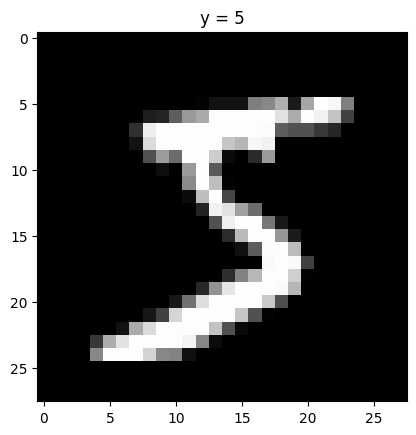

In [ ]:
# Plot the first element in the dataset
# Showing the raw data without transform

show_data(dataset[0])

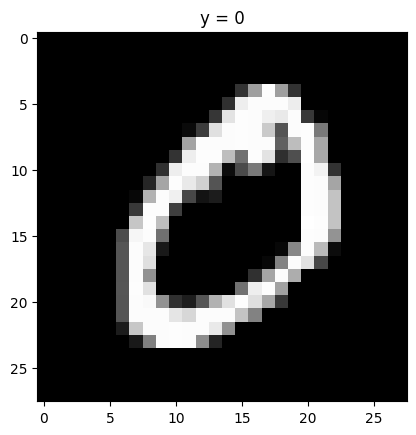

In [ ]:
# Plot the second element in the dataset
# Showing the raw data without transform

show_data(dataset[1])

In [ ]:
# Combine two transforms: crop and convert to tensor. Apply the compose to MNIST dataset

croptensor_data_transform = transforms.Compose([transforms.CenterCrop(20), transforms.ToTensor()])
dataset = dsets.MNIST(root = './data', download = True, transform = croptensor_data_transform)
print("The shape of the first element in the first tuple: ", dataset[0][0].shape)

The shape of the first element in the first tuple:  torch.Size([1, 20, 20])


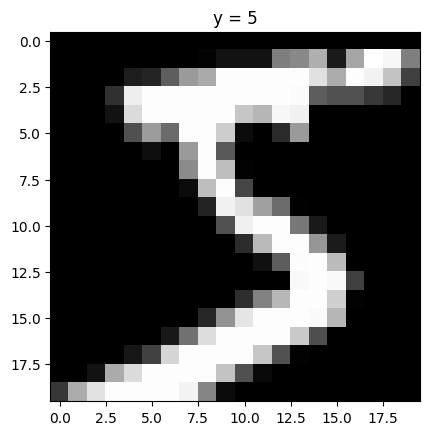

In [ ]:
# Plot the first element in the dataset
# transform is used in the dataset now and it become less apparent

show_data(dataset[0],shape = (20, 20))

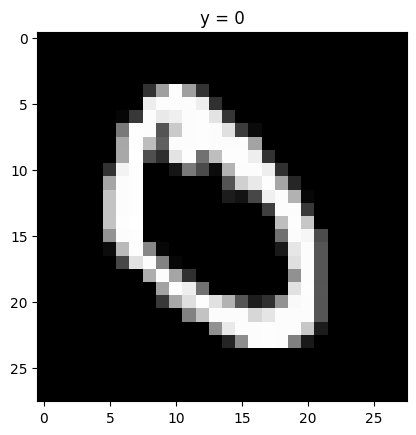

In [ ]:
# Construct the compose. Apply it on MNIST dataset. Plot the image out.

fliptensor_data_transform = transforms.Compose([transforms.RandomHorizontalFlip(p = 1),transforms.ToTensor()])
dataset = dsets.MNIST(root = './data', download = True, transform = fliptensor_data_transform)
show_data(dataset[1])

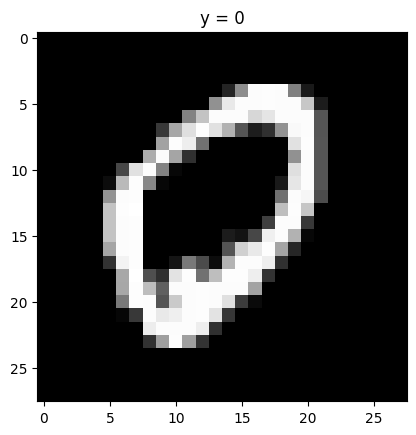

In [ ]:
# Construct the compose. Apply it on MNIST dataset. Plot the image out.

fliptensor_data_transform = transforms.Compose([transforms.RandomVerticalFlip(p = 1), transforms.RandomHorizontalFlip(p = 1),transforms.ToTensor()])
dataset = dsets.MNIST(root = './data', download = True, transform = fliptensor_data_transform)
show_data(dataset[1])

In [ ]:
train = datasets.MNIST("", train=True, download=True,
                       transform=transforms.Compose([transforms.ToTensor()]))
#root dir, for train its true and test will be false, downloads from net, converting img to the tensto

test = datasets.MNIST("", train=False, download=True,
                       transform=transforms.Compose([transforms.ToTensor()]))

In [ ]:
trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
trainset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=True)
#loading the data

In [ ]:
for data in trainset:
    print(data)
    break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [ ]:
x, y = data[0][1], data[1][1]

# print(x)
print(y)

#x is the data and y is the label

tensor(6)


In [ ]:
data[0][0].shape

torch.Size([1, 28, 28])

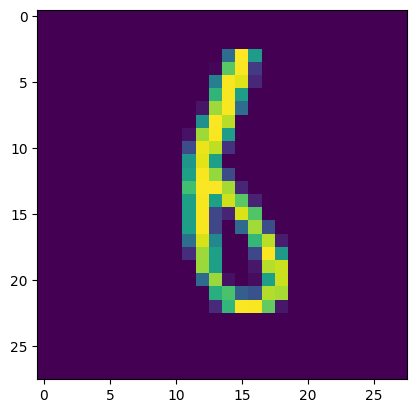

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(data[0][1].view(28,28)) #data[0][1] is a picture not label
plt.show()

**Linear Regression**

In [ ]:
# Define w = 2 and b = -1 for y = wx + b

w = torch.tensor(2.0, requires_grad = True) #requires_grad used as we have to learn them
b = torch.tensor(-1.0, requires_grad = True) #requires_grad used as we have to learn them

# Function forward(x) for prediction

def forward(x):
    yhat = w * x + b
    return yhat

In [ ]:
# Predict y = 2x - 1 at x = 1

x = torch.tensor([[1.0]])
yhat = forward(x)
print("The prediction: ", yhat)

The prediction:  tensor([[1.]], grad_fn=<AddBackward0>)


In [ ]:
# Create x Tensor and check the shape of x tensor

x = torch.tensor([[1.0], [2.0]])
print("The shape of x: ", x.shape)

# Make the prediction of y = 2x - 1 at x = [1, 2]

yhat = forward(x)
print("The prediction: ", yhat)

The shape of x:  torch.Size([2, 1])
The prediction:  tensor([[1.],
        [3.]], grad_fn=<AddBackward0>)


In [ ]:
# Practice: Make a prediction of y = 2x - 1 at x = [[1.0], [2.0], [3.0]]

x = torch.tensor([[1.0], [2.0], [3.0]])

yhat = forward(x)
print("The prediction: ", yhat)

The prediction:  tensor([[1.],
        [3.],
        [5.]], grad_fn=<AddBackward0>)


In [ ]:
#Set the random seed because the parameters are randomly initialized:
torch.manual_seed(1)

In [ ]:
# Create Linear Regression Model, and print out the parameters

lr = Linear(in_features=1, out_features=1, bias=True)
print("Parameters w and b: ", list(lr.parameters()))


Parameters w and b:  [Parameter containing:
tensor([[-0.1939]], requires_grad=True), Parameter containing:
tensor([0.4694], requires_grad=True)]


A method  <code>state_dict()</code> Returns a Python dictionary object corresponding to the layers of each parameter  tensor.


In [ ]:
print("Python dictionary: ",lr.state_dict())
print("keys: ",lr.state_dict().keys())
print("values: ",lr.state_dict().values())

Python dictionary:  OrderedDict([('weight', tensor([[-0.1939]])), ('bias', tensor([0.4694]))])
keys:  odict_keys(['weight', 'bias'])
values:  odict_values([tensor([[-0.1939]]), tensor([0.4694])])


In [ ]:
print("weight:",lr.weight)
print("bias:",lr.bias)

weight: Parameter containing:
tensor([[-0.1939]], requires_grad=True)
bias: Parameter containing:
tensor([0.4694], requires_grad=True)


In [ ]:
x = torch.tensor([[2.5]])
y = lr(x)
print(y)

tensor([[-0.0153]], grad_fn=<AddmmBackward0>)


In [ ]:
# Create the prediction using linear model

x = torch.tensor([[1.0], [2.0]])
yhat = lr(x)
print("The prediction: ", yhat)

The prediction:  tensor([[0.2755],
        [0.0816]], grad_fn=<AddmmBackward0>)


Now, let's build a custom module. We can make more complex models by using this method later on.


In [ ]:
# Customize Linear Regression Class

class LR(nn.Module):

    # Constructor
    def __init__(self, input_size, output_size):

        # Inherit from parent
        super(LR, self).__init__()
        self.linear = nn.Linear(input_size, output_size)

    # Prediction function
    def forward(self, x):
        out = self.linear(x)
        return out

In [ ]:
# Create the linear regression model. Print out the parameters.

lr = LR(1, 1)
print("The parameters: ", list(lr.parameters()))
print("Linear model: ", lr.linear)

The parameters:  [Parameter containing:
tensor([[-0.0075]], requires_grad=True), Parameter containing:
tensor([0.5364], requires_grad=True)]
Linear model:  Linear(in_features=1, out_features=1, bias=True)


In [ ]:
# Try our customize linear regression model with single input

x = torch.tensor([[1.0]])
yhat = lr(x)
print("The prediction: ", yhat)

The prediction:  tensor([[0.5290]], grad_fn=<AddmmBackward0>)


In [ ]:
# Try our customize linear regression model with multiple input

x = torch.tensor([[5.0], [2.0]])
yhat = lr(x)
print("The prediction: ", yhat)

The prediction:  tensor([[0.4990],
        [0.5215]], grad_fn=<AddmmBackward0>)


In [ ]:
print("Python dictionary: ", lr.state_dict())
print("keys: ",lr.state_dict().keys())
print("values: ",lr.state_dict().values())


Python dictionary:  OrderedDict([('linear.weight', tensor([[-0.0075]])), ('linear.bias', tensor([0.5364]))])
keys:  odict_keys(['linear.weight', 'linear.bias'])
values:  odict_values([tensor([[-0.0075]]), tensor([0.5364])])


**Linear regression with one perameter**

In [36]:
# Generate values from -3 to 3 that create a line with a slope of -3. This is the line you will estimate.
# Create the f(X) with a slope of -3

X = torch.arange(-3, 3, 0.1).view(-1, 1)
f = -3 * X
print(X.size())

torch.Size([60, 1])


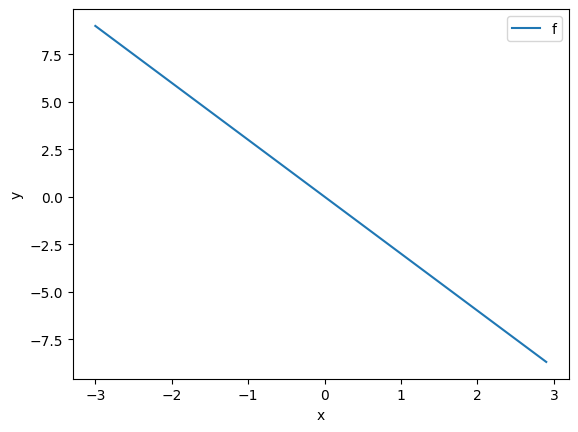

In [30]:
# Plot the line with blue

plt.plot(X.numpy(), f.numpy(), label = 'f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [25]:
# Let us add some noise to the data in order to simulate the real data. Use torch.randn(X.size())
# to generate Gaussian noise that is the same size as X and has a standard deviation opf 0.1.
# Add some noise to f(X) and save it in Y

Y = f + 0.1 * torch.randn(X.size())

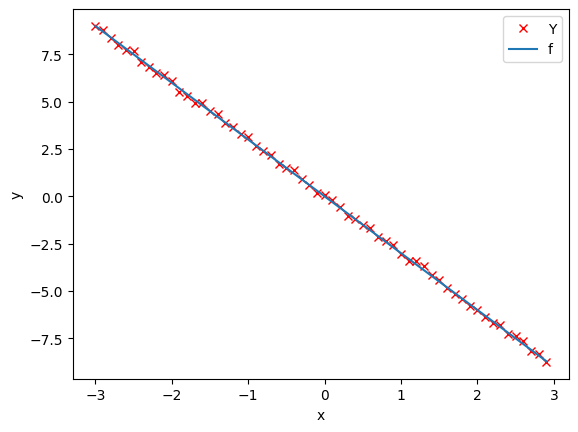

In [26]:
# Plot the data points

plt.plot(X.numpy(), Y.numpy(), 'rx', label = 'Y')

plt.plot(X.numpy(), f.numpy(), label = 'f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [31]:
# Create forward function for prediction

def forward(x):
    return w * x

In [32]:
# Create the MSE function for evaluate the result.
# Define the cost or criterion function using MSE (Mean Square Error):

def criterion(yhat, y):
    return torch.mean((yhat - y) ** 2)

In [4]:
# Create Learning Rate and an empty list to record the loss for each iteration

lr = 0.1
LOSS = []

In [6]:
# Now, we create a model parameter by setting the argument requires_grad to True because the system must learn it

w = torch.tensor(-10.0, requires_grad = True)

In [8]:
# The class for plotting

class plot_diagram():

    # Constructor
    def __init__(self, X, Y, w, stop, go = False):
        start = w.data
        self.error = []
        self.parameter = []
        print(type(X.numpy()))
        self.X = X.numpy()

        self.Y = Y.numpy()
        self.parameter_values = torch.arange(start, stop)
        self.Loss_function = [criterion(forward(X), Y) for w.data in self.parameter_values]
        w.data = start

    # Executor
    def __call__(self, Yhat, w, error, n):
        self.error.append(error)
        self.parameter.append(w.data)
        plt.subplot(212)
        plt.plot(self.X, Yhat.detach().numpy())
        plt.plot(self.X, self.Y,'ro')
        plt.xlabel("A")
        plt.ylim(-20, 20)
        plt.subplot(211)
        plt.title("Data Space (top) Estimated Line (bottom) Iteration " + str(n))
        # Convert lists to PyTorch tensors
        parameter_values_tensor = torch.tensor(self.parameter_values)
        loss_function_tensor = torch.tensor(self.Loss_function)

        # Plot using the tensors
        plt.plot(parameter_values_tensor.numpy(), loss_function_tensor.numpy())

        plt.plot(self.parameter, self.error, 'ro')
        plt.xlabel("B")
        plt.figure()

    # Destructor
    def __del__(self):
        plt.close('all')

In [33]:
gradient_plot = plot_diagram(X, Y, w, stop = 5)

<class 'numpy.ndarray'>


In [37]:
# Define a function for train the model

def train_model(iter):
    for epoch in range (iter):

        # make the prediction as we learned in the last lab
        Yhat = forward(X)

        # calculate the iteration
        loss = criterion(Yhat,Y)

        # plot the diagram for us to have a better idea
        gradient_plot(Yhat, w, loss.item(), epoch)

        # store the loss into list
        LOSS.append(loss.item())

        # backward pass: compute gradient of the loss with respect to all the learnable parameters
        loss.backward()

        # updata parameters
        w.data = w.data - lr * w.grad.data

        # zero the gradients before running the backward pass
        w.grad.data.zero_()

<ipython-input-8-aed0fd8494ff>:30: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  parameter_values_tensor = torch.tensor(self.parameter_values)


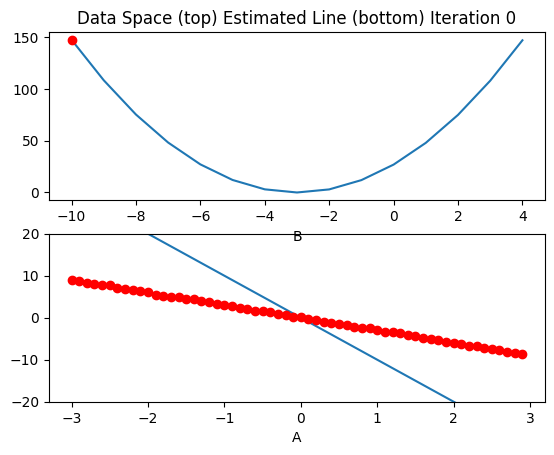

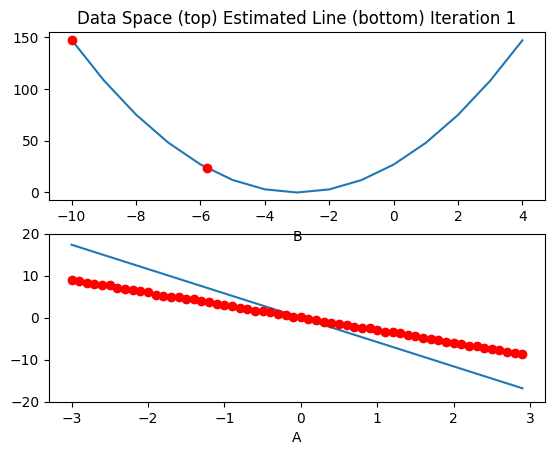

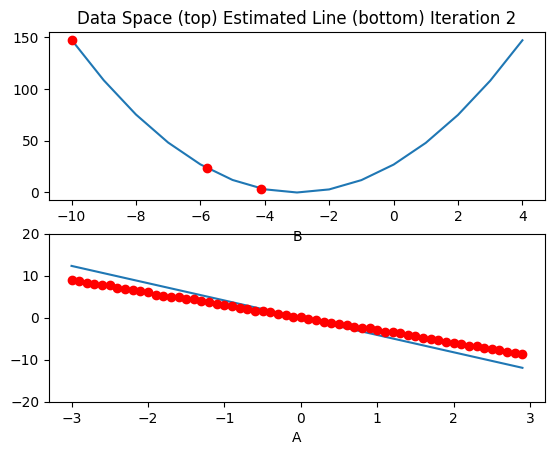

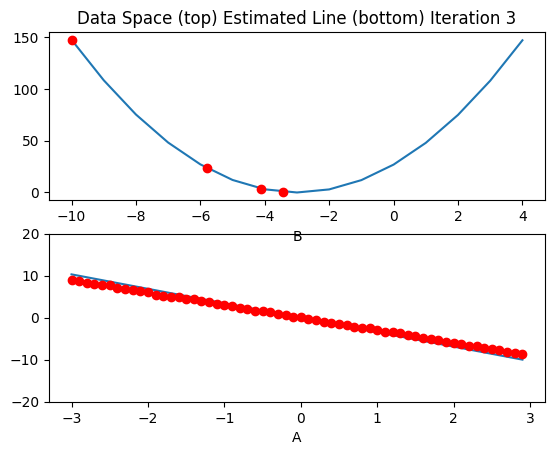

<Figure size 640x480 with 0 Axes>

In [38]:
# Give 4 iterations for training the model here.

train_model(4)

Text(38.347222222222214, 0.5, 'Cost')

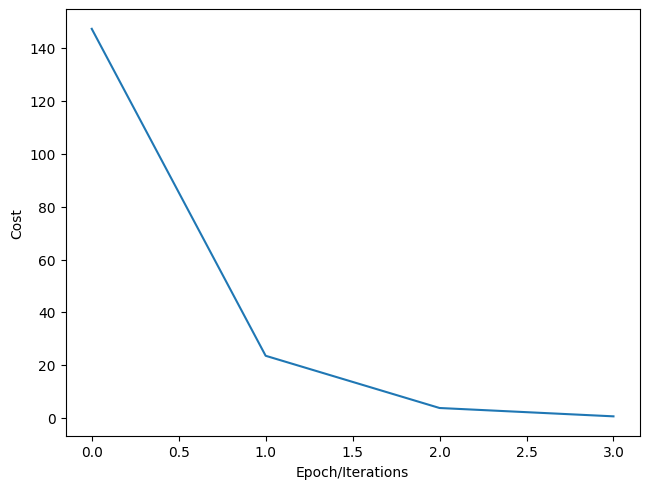

In [39]:
# Plot the loss for each iteration

plt.plot(LOSS)
plt.tight_layout()
plt.xlabel("Epoch/Iterations")
plt.ylabel("Cost")